# ML class final project part3
##  Almog Shor
## Yehudit Brickner

imports

In [59]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import time
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

create the data set with all of the features

In [60]:
def create_df1(folder):

    folder_dir= os.listdir(folder)
    
    big_list=[]
    my_list=[]
    count=0
    c=0
    for i in folder_dir:
        print(i)
        j = os.listdir(folder+"/"+i)
        if i in ['american_football','basketball','hockey_puck','shuttlecock']:
            for k in range(len(j)):
                try:
                    img = cv2.imread(folder+"/"+i+"/"+j[k], cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img,(200,200), interpolation = cv2.INTER_AREA)
                    
                    # histogram_r, bin_edges = np.histogram(img[:, :, 0], bins=256, range=(0, 256)) 
                    # histogram_g, bin_edges = np.histogram(img[:, :, 1], bins=256, range=(0, 256)) 
                    # histogram_b, bin_edges = np.histogram(img[:, :, 2], bins=256, range=(0, 256)) 
                    
                    # dst = cv2.Canny(img, 50, 200, None, 3)
                    # dst1 = cv2.Canny(img, 50, 200, None, 3)
                    # lines = cv2.HoughLines(dst1, 1, np.pi / 180, 50, None, 0, 0)
                    
                    # gray = cv2.imread(folder+"/"+i+"/"+j[k],cv2.IMREAD_GRAYSCALE)
                    # gray =  cv2.resize(gray,(200,200), interpolation = cv2.INTER_AREA)
                    # gray = cv2.medianBlur(gray, 5)
                    # rows = gray.shape[0]
                    # circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                    #                 param1=100, param2=30,
                    #                 minRadius=10, maxRadius=100)
                    
                    my_list=[]
                    my_list.append(folder+"/"+i+"/"+j[k])
                    my_list.append(i)
                    my_list.append(c)
                    # if lines is None:
                    #     my_list.append(0)
                    #     my_list.append(0)   
                    # else:
                    #     my_list.append(1)
                    #     my_list.append(len(lines))
                    # if circles is None:
                    #     my_list.append(0)
                    #     my_list.append(0)   
                    # else:
                    #     my_list.append(1)
                    #     my_list.append(circles.shape[1])
                    
                    # my_list.extend(histogram_r)
                    # my_list.extend(histogram_g)
                    # my_list.extend(histogram_b)
                    my_list.extend(img.flatten())
                    # my_list.extend(dst.flatten())

                    big_list.append(my_list)
                    count+=1
                    
                except:
                    print("there was an error with count ",count)

        c+=1

    
    print("creating df")
    # cols = ['path','class_name','class_number','lines?','#lines','circles?','#circles']
    cols = ['path','class_name','class_number']
    # for h in range(256):
    #     cols.append("r"+str(h))
    # for h in range(256):
    #     cols.append("g"+str(h))
    # for h in range(256):
    #     cols.append("b"+str(h))
    for h in range(200*200*3):
        cols.append("i"+str(h))
    # for h in range(200*200):
    #     cols.append("e"+str(h))

    df = pd.DataFrame(big_list, columns = cols) 

    print("created df")
              
    return df

In [61]:
# folder ="C:/Users/nechd/Downloads/ball_classification/train"
# start_time = time.time()
# full_ball_edge_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)

In [62]:
# full_ball_edge_df.shape
# full_ball_edge_df.head()

In [63]:
# full_ball_edge_df.to_csv('image.csv', index=False)

In [64]:
# folder ="C:/Users/nechd/Downloads/ball_classification/test"
# start_time = time.time()
# full_test_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)

In [65]:
# full_test_df.to_csv('final_test_data_image.csv', index=False)

import the data with some/all features

In [66]:
image = pd.read_csv('image.csv')
del image['path']
del image['class_name']
ball_type = [0,2,9,11]
edge_4balls = image.loc[image['class_number'].isin(ball_type)]
print(edge_4balls.shape)
edge_4balls_no_na = edge_4balls.dropna()
print(edge_4balls_no_na.shape)

(1543, 120001)
(1533, 120001)


In [67]:
X = edge_4balls_no_na.drop(['class_number'], axis=1)
y = edge_4balls_no_na['class_number']

train test split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

extra functions

In [69]:
# function to represent the confusion matrix nicely
def Confusion_Matrix(cf_matrix):
    plt.figure(figsize=(6,6))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')

In [70]:
# list to hold all final results
results=[]

model imports

In [71]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression



# RUN ON DATA SET OF IMAGE PCA 100

In [72]:
pca1=PCA(n_components=100)
X_train6=pca1.fit_transform(X_train)
X_test6=pca1.transform(X_test)
y_train6 = y_train
y_test6 = y_test

print(X_train6.shape)
print(X_test6.shape)

(1073, 100)
(460, 100)


#### SVM

In [73]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train6, y_train6)
            pred_svm = svm.predict(X_test6)
            print(i,j,round(np.sum([y_test6==pred_svm])/len(y_test6),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train6, y_train6)
            pred_svm = svm.predict(X_test6)
            print(i,j,round(np.sum([y_test6==pred_svm])/len(y_test6),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train6, y_train6)
            pred_svm = svm.predict(X_test6)
            print(i,j,round(np.sum([y_test6==pred_svm])/len(y_test6),4)*100,"%")
        except:
            pass

OneVsOneClassifier
hinge l2 47.17 %
squared_hinge l2 47.17 %
OutputCodeClassifier
hinge l2 28.04 %
squared_hinge l2 40.87 %
OneVsRestClassifier
hinge l2 47.17 %
squared_hinge l2 47.17 %


              precision    recall  f1-score   support

           0       0.42      0.40      0.41       110
           2       0.38      0.55      0.45       100
           9       0.43      0.18      0.25       111
          11       0.60      0.71      0.65       139

    accuracy                           0.47       460
   macro avg       0.46      0.46      0.44       460
weighted avg       0.47      0.47      0.45       460

47.17 %


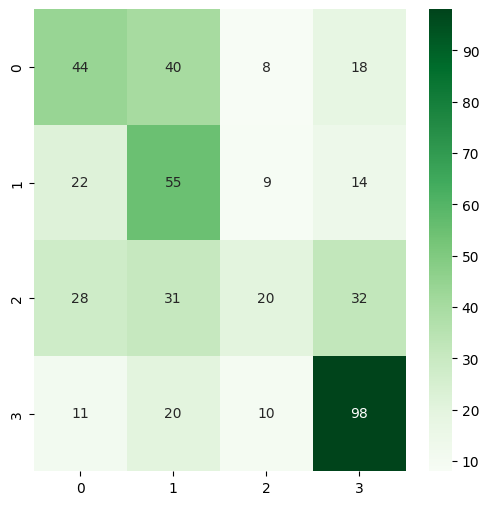

In [74]:
svm6 =  OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train6, y_train6)
pred_svm6 = svm6.predict(X_test6)
Confusion_Matrix(confusion_matrix(y_test6,pred_svm6))
print(classification_report(y_test6, pred_svm6))
print(round(np.sum([y_test6==pred_svm6])/len(y_test6),4)*100,"%")
results.append(['images PCA 100', 'SVM',round(np.sum([y_test6==pred_svm6])/len(y_test6),4)*100 ])

#### KNN

In [75]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train6,y_train6)
    pred_knn = neigh.predict(X_test6)
    print(i,round(np.sum([y_test6==pred_knn])/len(y_test6),4)*100,"%")

1 60.870000000000005 %
2 56.3 %
3 56.74 %
4 54.779999999999994 %
5 54.35 %
6 54.35 %
7 55.22 %
8 55.65 %
9 56.96 %
10 56.74 %
11 56.74 %
12 55.43 %
13 55.00000000000001 %
14 53.910000000000004 %
15 52.17 %
16 54.13 %
17 54.13 %
18 53.7 %
19 54.56999999999999 %
20 54.13 %
21 53.7 %
22 54.56999999999999 %
23 54.779999999999994 %
24 55.00000000000001 %
25 55.87 %
26 55.00000000000001 %
27 55.00000000000001 %
28 55.43 %
29 54.56999999999999 %
30 54.35 %
31 54.35 %
32 54.779999999999994 %
33 55.00000000000001 %
34 53.910000000000004 %
35 54.56999999999999 %
36 53.910000000000004 %
37 53.7 %
38 54.779999999999994 %
39 54.779999999999994 %
40 54.56999999999999 %
41 55.22 %
42 54.779999999999994 %
43 54.35 %
44 53.910000000000004 %
45 53.910000000000004 %
46 54.13 %
47 53.910000000000004 %
48 52.39 %
49 51.739999999999995 %
50 52.17 %


              precision    recall  f1-score   support

           0       0.57      0.56      0.57       110
           2       0.60      0.61      0.60       100
           9       0.58      0.49      0.53       111
          11       0.66      0.74      0.70       139

    accuracy                           0.61       460
   macro avg       0.60      0.60      0.60       460
weighted avg       0.61      0.61      0.61       460

60.870000000000005 %


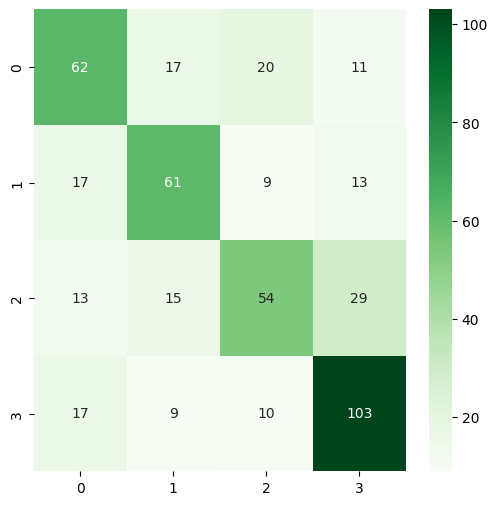

In [76]:
neigh6 = KNeighborsClassifier(n_neighbors=1)
neigh6.fit(X_train6,y_train6)
pred_knn6 = neigh6.predict(X_test6)
Confusion_Matrix(confusion_matrix(y_test6,pred_knn6))
print(classification_report(y_test6, pred_knn6))
print(round(np.sum([y_test6==pred_knn6])/len(y_test6),4)*100,"%")
results.append(['images PCA 100', 'KNN',round(np.sum([y_test6==pred_knn6])/len(y_test6),4)*100 ])

#### Adaboost

In [77]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train6,y_train6)
    pred_ada = ada.predict(X_test6)
    print(i,round(np.sum([y_test6==pred_ada])/len(y_test6),4)*100,"%")

50 49.57 %
100 48.699999999999996 %
150 48.26 %
200 50.22 %
250 52.61 %
300 53.04 %
350 52.17 %
400 54.779999999999994 %
450 56.089999999999996 %
500 54.13 %
550 54.779999999999994 %
600 54.56999999999999 %
650 55.00000000000001 %
700 53.26 %
750 54.779999999999994 %
800 54.35 %
850 54.779999999999994 %
900 54.56999999999999 %
950 56.3 %
1000 56.74 %
1050 56.089999999999996 %
1100 54.779999999999994 %
1150 55.43 %
1200 54.779999999999994 %
1250 55.22 %
1300 55.87 %
1350 55.43 %
1400 56.74 %
1450 55.65 %
1500 55.65 %
1550 56.089999999999996 %
1600 55.43 %
1650 56.089999999999996 %
1700 56.96 %
1750 57.17 %
1800 55.65 %
1850 55.22 %
1900 55.00000000000001 %
1950 55.65 %
2000 55.65 %


              precision    recall  f1-score   support

           0       0.45      0.51      0.48       110
           2       0.51      0.47      0.49       100
           9       0.46      0.44      0.45       111
          11       0.74      0.72      0.73       139

    accuracy                           0.55       460
   macro avg       0.54      0.53      0.54       460
weighted avg       0.55      0.55      0.55       460

54.779999999999994 %


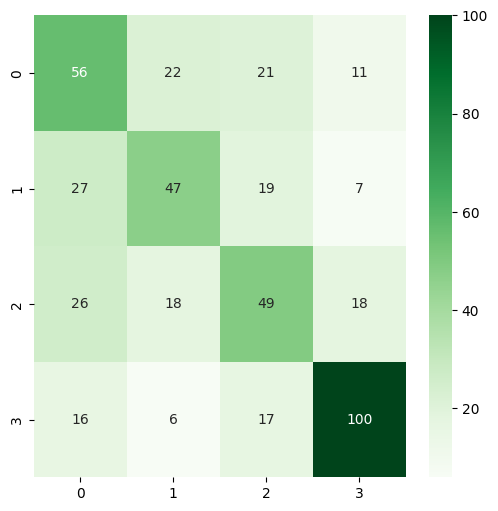

In [78]:
ada6 = AdaBoostClassifier(n_estimators=1200, algorithm="SAMME",random_state=0)
ada6.fit(X_train6,y_train6)
pred_ada6 = ada6.predict(X_test6)
Confusion_Matrix(confusion_matrix(y_test6,pred_ada6))
print(classification_report(y_test6, pred_ada6))
print(round(np.sum([y_test6==pred_ada6])/len(y_test6),4)*100,"%")
results.append(['images PCA 100', 'Adaboost',round(np.sum([y_test6==pred_ada6])/len(y_test6),4)*100 ])

#### Random Forest

In [79]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train6,y_train6)
        pred_RF = RF.predict(X_test6)
        print(i,j,round(np.sum([y_test6==pred_RF])/len(y_test6),4)*100,"%")

40 2 58.699999999999996 %
40 3 58.91 %
40 4 61.739999999999995 %
60 2 60.870000000000005 %
60 3 63.04 %
60 4 62.39 %
80 2 60.650000000000006 %
80 3 62.39 %
80 4 64.78 %
100 2 61.519999999999996 %
100 3 64.13 %
100 4 63.7 %
120 2 62.39 %
120 3 64.13 %
120 4 63.04 %
140 2 62.17 %
140 3 64.57000000000001 %
140 4 64.13 %
160 2 61.739999999999995 %
160 3 65.42999999999999 %
160 4 64.35 %
180 2 61.519999999999996 %
180 3 65.42999999999999 %
180 4 63.260000000000005 %
200 2 62.83 %
200 3 64.78 %
200 4 64.78 %
220 2 62.83 %
220 3 65.42999999999999 %
220 4 64.57000000000001 %
240 2 62.17 %
240 3 65.22 %
240 4 64.35 %
260 2 62.83 %
260 3 65.86999999999999 %
260 4 65.22 %
280 2 64.35 %
280 3 66.09 %
280 4 65.0 %
300 2 62.83 %
300 3 65.86999999999999 %
300 4 65.86999999999999 %
320 2 61.96 %
320 3 66.3 %
320 4 65.42999999999999 %
340 2 63.260000000000005 %
340 3 66.09 %
340 4 65.0 %
360 2 63.260000000000005 %
360 3 65.42999999999999 %
360 4 64.57000000000001 %
380 2 63.7 %
380 3 66.09 %
380 4 65.4

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       110
           2       0.66      0.52      0.58       100
           9       0.67      0.49      0.56       111
          11       0.70      0.76      0.73       139

    accuracy                           0.63       460
   macro avg       0.64      0.62      0.62       460
weighted avg       0.64      0.63      0.63       460

63.04 %


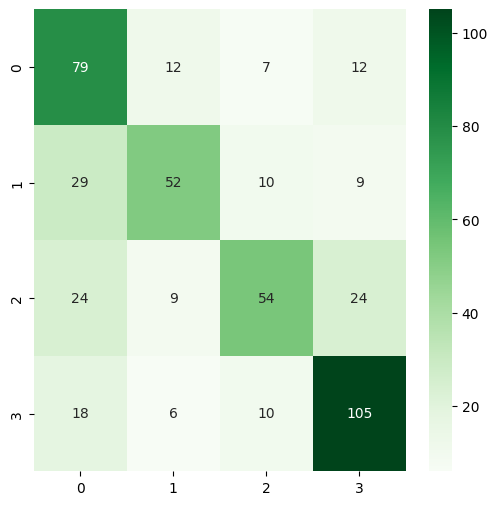

In [80]:
RF6 = RandomForestClassifier(n_estimators=120, max_depth=None,min_samples_split=4, random_state=0)
RF6.fit(X_train6,y_train6)
pred_RF6 = RF6.predict(X_test6)
Confusion_Matrix(confusion_matrix(y_test6,pred_RF6))
print(classification_report(y_test6, pred_RF6))
print(round(np.sum([y_test6==pred_RF6])/len(y_test6),4)*100,"%")
results.append(['images PCA 100', 'Random Forest',round(np.sum([y_test6==pred_RF6])/len(y_test6),4)*100 ])

#### Logistic Regression

In [81]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train6,y_train6)
                pred_LR = LR.predict(X_test6)
                print(i,j,k,round(np.sum([y_test6==pred_LR])/len(y_test6),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 56.089999999999996 %
l1 liblinear 0.01 55.43 %
l1 liblinear 0.001 54.779999999999994 %
l1 saga 0.1 56.96 %
l1 saga 0.01 55.87 %
l1 saga 0.001 55.65 %
l2 lbfgs 0.1 55.87 %
l2 lbfgs 0.01 55.87 %
l2 lbfgs 0.001 55.87 %
l2 liblinear 0.1 54.779999999999994 %
l2 liblinear 0.01 55.00000000000001 %
l2 liblinear 0.001 54.779999999999994 %
l2 newton-cg 0.1 53.910000000000004 %
l2 newton-cg 0.01 53.910000000000004 %


c:\Users\nechd\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


l2 newton-cg 0.001 53.910000000000004 %
l2 sag 0.1 56.3 %
l2 sag 0.01 55.87 %
l2 sag 0.001 55.87 %
l2 saga 0.1 56.96 %
l2 saga 0.01 55.87 %
l2 saga 0.001 55.65 %


              precision    recall  f1-score   support

           0       0.52      0.56      0.54       110
           2       0.54      0.45      0.49       100
           9       0.53      0.33      0.41       111
          11       0.63      0.85      0.72       139

    accuracy                           0.57       460
   macro avg       0.55      0.55      0.54       460
weighted avg       0.56      0.57      0.55       460

56.96 %


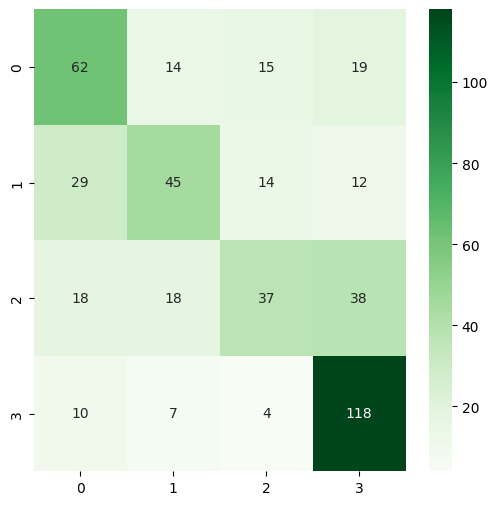

In [82]:
LR6 = LogisticRegression(penalty="l1", solver="saga", tol=0.1, max_iter=10000, random_state=0)
LR6.fit(X_train6,y_train6)
pred_LR6 = LR6.predict(X_test6)
Confusion_Matrix(confusion_matrix(y_test6,pred_LR6))
print(classification_report(y_test6, pred_LR6))
print(round(np.sum([y_test6==pred_LR6])/len(y_test6),4)*100,"%")
results.append(['images PCA 100', 'Logistic Regression',round(np.sum([y_test6==pred_LR6])/len(y_test6),4)*100 ])

# RUN ON DATA SET OF IMAGE PCA 200

In [83]:
pca2=PCA(n_components=200)
X_train7=pca2.fit_transform(X_train)
X_test7=pca2.transform(X_test)
y_train7 = y_train
y_test7 = y_test

print(X_train7.shape)
print(X_test7.shape)

(1073, 200)
(460, 200)


#### SVM

In [84]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train7, y_train7)
            pred_svm = svm.predict(X_test7)
            print(i,j,round(np.sum([y_test7==pred_svm])/len(y_test7),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train7, y_train7)
            pred_svm = svm.predict(X_test7)
            print(i,j,round(np.sum([y_test7==pred_svm])/len(y_test7),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train7, y_train7)
            pred_svm = svm.predict(X_test7)
            print(i,j,round(np.sum([y_test7==pred_svm])/len(y_test7),4)*100,"%")
        except:
            pass

OneVsOneClassifier
hinge l2 51.519999999999996 %
squared_hinge l2 51.519999999999996 %
OutputCodeClassifier
hinge l2 43.7 %
squared_hinge l2 48.26 %
OneVsRestClassifier
hinge l2 42.83 %
squared_hinge l2 42.83 %


              precision    recall  f1-score   support

           0       0.45      0.45      0.45       110
           2       0.43      0.51      0.47       100
           9       0.46      0.36      0.40       111
          11       0.66      0.70      0.68       139

    accuracy                           0.52       460
   macro avg       0.50      0.50      0.50       460
weighted avg       0.51      0.52      0.51       460

51.519999999999996 %


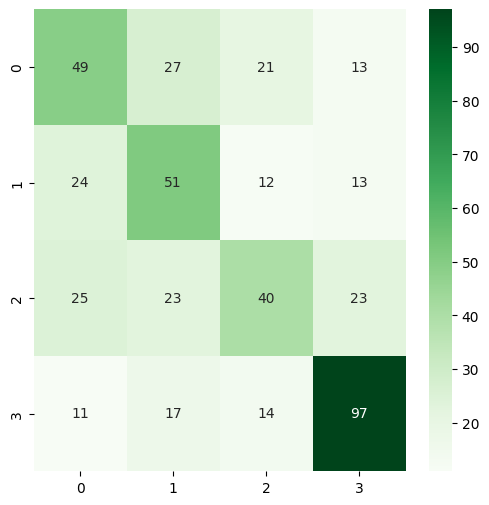

In [85]:
svm7 = OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train7, y_train7)
pred_svm7 = svm7.predict(X_test7)
Confusion_Matrix(confusion_matrix(y_test7,pred_svm7))
print(classification_report(y_test7, pred_svm7))
print(round(np.sum([y_test7==pred_svm7])/len(y_test7),4)*100,"%")
results.append(['images PCA 200', 'SVM',round(np.sum([y_test7==pred_svm7])/len(y_test7),4)*100 ])

#### KNN

In [86]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train7,y_train7)
    pred_knn = neigh.predict(X_test7)
    print(i,round(np.sum([y_test7==pred_knn])/len(y_test7),4)*100,"%")

1 59.35 %
2 54.13 %
3 56.74 %
4 53.26 %
5 51.959999999999994 %
6 53.26 %
7 55.65 %
8 55.43 %
9 56.3 %
10 58.040000000000006 %
11 57.60999999999999 %
12 56.089999999999996 %
13 54.56999999999999 %
14 55.65 %
15 55.00000000000001 %
16 53.910000000000004 %
17 53.7 %
18 54.779999999999994 %
19 55.00000000000001 %
20 54.56999999999999 %
21 54.56999999999999 %
22 55.22 %
23 55.43 %
24 55.87 %
25 55.87 %
26 55.22 %
27 54.35 %
28 54.13 %
29 54.779999999999994 %
30 54.13 %
31 54.13 %
32 54.56999999999999 %
33 55.22 %
34 54.779999999999994 %
35 54.35 %
36 55.00000000000001 %
37 55.00000000000001 %
38 55.22 %
39 54.35 %
40 54.779999999999994 %
41 53.910000000000004 %
42 55.22 %
43 54.779999999999994 %
44 53.480000000000004 %
45 53.910000000000004 %
46 53.7 %
47 53.7 %
48 53.480000000000004 %
49 52.61 %
50 52.61 %


              precision    recall  f1-score   support

           0       0.56      0.54      0.55       110
           2       0.61      0.59      0.60       100
           9       0.54      0.47      0.50       111
          11       0.64      0.74      0.69       139

    accuracy                           0.59       460
   macro avg       0.59      0.58      0.58       460
weighted avg       0.59      0.59      0.59       460

59.35 %


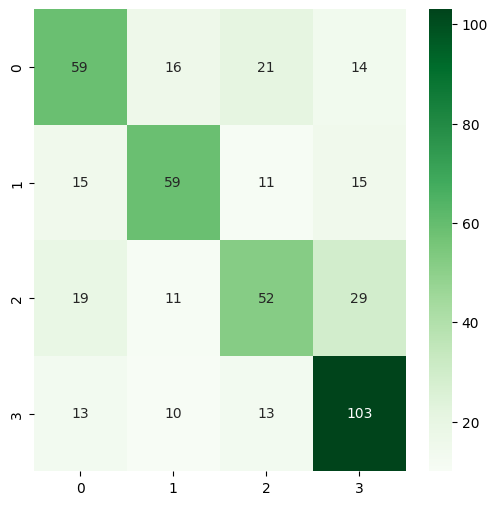

In [87]:
neigh7 = KNeighborsClassifier(n_neighbors=1)
neigh7.fit(X_train7,y_train7)
pred_knn7 = neigh7.predict(X_test7)
Confusion_Matrix(confusion_matrix(y_test7,pred_knn7))
print(classification_report(y_test7, pred_knn7))
print(round(np.sum([y_test7==pred_knn7])/len(y_test7),4)*100,"%")
results.append(['images PCA 200', 'KNN',round(np.sum([y_test7==pred_knn7])/len(y_test7),4)*100 ])

#### Adaboost

In [88]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train7,y_train7)
    pred_ada = ada.predict(X_test7)
    print(i,round(np.sum([y_test7==pred_ada])/len(y_test7),4)*100,"%")

50 50.870000000000005 %
100 50.22 %
150 53.7 %
200 53.7 %
250 53.04 %
300 52.83 %
350 53.04 %
400 52.61 %
450 52.61 %
500 52.17 %
550 54.13 %
600 54.35 %
650 55.65 %
700 52.83 %
750 54.13 %
800 52.83 %
850 52.17 %
900 53.04 %
950 54.56999999999999 %
1000 52.83 %
1050 52.61 %
1100 52.39 %
1150 53.04 %
1200 52.83 %
1250 53.26 %
1300 51.959999999999994 %
1350 51.519999999999996 %
1400 51.959999999999994 %
1450 51.959999999999994 %
1500 52.39 %
1550 52.61 %
1600 52.61 %
1650 52.61 %
1700 52.61 %
1750 51.959999999999994 %
1800 51.300000000000004 %
1850 52.17 %
1900 50.64999999999999 %
1950 51.739999999999995 %
2000 51.519999999999996 %


              precision    recall  f1-score   support

           0       0.43      0.51      0.46       110
           2       0.48      0.40      0.43       100
           9       0.52      0.43      0.47       111
          11       0.69      0.76      0.73       139

    accuracy                           0.54       460
   macro avg       0.53      0.53      0.52       460
weighted avg       0.54      0.54      0.54       460

54.35 %


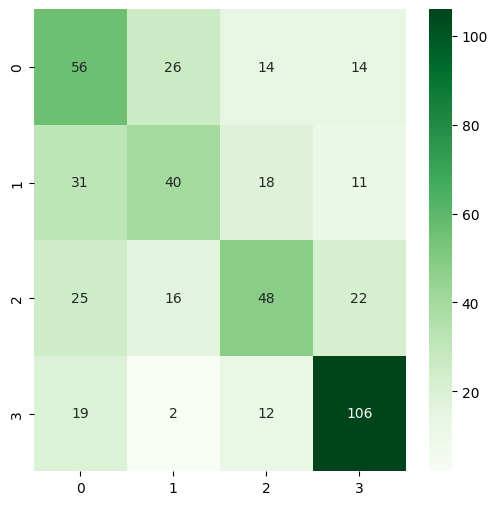

In [89]:
ada7 = AdaBoostClassifier(n_estimators=600, algorithm="SAMME",random_state=0)
ada7.fit(X_train7,y_train7)
pred_ada7 = ada7.predict(X_test7)
Confusion_Matrix(confusion_matrix(y_test7,pred_ada7))
print(classification_report(y_test7, pred_ada7))
print(round(np.sum([y_test7==pred_ada7])/len(y_test7),4)*100,"%")
results.append(['images PCA 200', 'Adaboost',round(np.sum([y_test7==pred_ada7])/len(y_test7),4)*100 ])

#### Random Forest

In [90]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train7,y_train7)
        pred_RF = RF.predict(X_test7)
        print(i,j,round(np.sum([y_test7==pred_RF])/len(y_test7),4)*100,"%")

40 2 57.17 %
40 3 57.17 %
40 4 59.35 %
60 2 58.91 %
60 3 58.26 %
60 4 59.57 %
80 2 60.870000000000005 %
80 3 58.91 %
80 4 61.3 %
100 2 60.870000000000005 %
100 3 59.78 %
100 4 61.96 %
120 2 60.22 %
120 3 60.650000000000006 %
120 4 62.39 %
140 2 62.39 %
140 3 60.870000000000005 %
140 4 61.3 %
160 2 62.17 %
160 3 59.78 %
160 4 61.96 %
180 2 62.61 %
180 3 60.870000000000005 %
180 4 61.3 %
200 2 63.7 %
200 3 61.739999999999995 %
200 4 60.870000000000005 %
220 2 63.260000000000005 %
220 3 62.39 %
220 4 60.42999999999999 %
240 2 64.57000000000001 %
240 3 62.17 %
240 4 61.09 %
260 2 64.13 %
260 3 62.83 %
260 4 61.3 %
280 2 63.480000000000004 %
280 3 63.260000000000005 %
280 4 62.17 %
300 2 63.04 %
300 3 63.480000000000004 %
300 4 62.39 %
320 2 63.04 %
320 3 63.260000000000005 %
320 4 62.17 %
340 2 63.04 %
340 3 65.22 %
340 4 61.96 %
360 2 64.13 %
360 3 65.22 %
360 4 61.96 %
380 2 64.13 %
380 3 65.86999999999999 %
380 4 61.739999999999995 %
400 2 63.480000000000004 %
400 3 65.42999999999999 %


              precision    recall  f1-score   support

           0       0.53      0.75      0.62       110
           2       0.71      0.46      0.56       100
           9       0.67      0.52      0.59       111
          11       0.68      0.76      0.72       139

    accuracy                           0.63       460
   macro avg       0.65      0.62      0.62       460
weighted avg       0.65      0.63      0.63       460

63.480000000000004 %


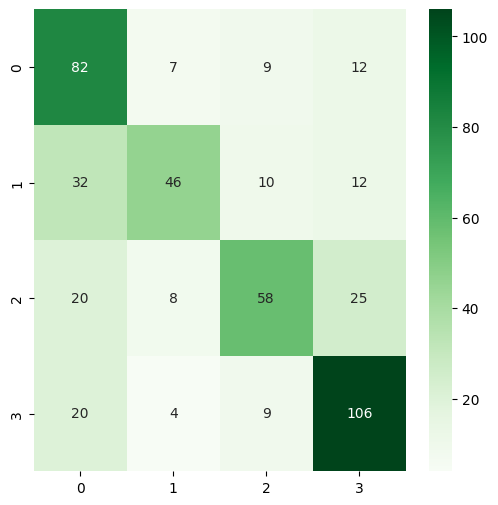

In [91]:
RF7 = RandomForestClassifier(n_estimators=400, max_depth=None,min_samples_split=2, random_state=0)
RF7.fit(X_train7,y_train7)
pred_RF7 = RF7.predict(X_test7)
Confusion_Matrix(confusion_matrix(y_test7,pred_RF7))
print(classification_report(y_test7, pred_RF7))
print(round(np.sum([y_test7==pred_RF7])/len(y_test7),4)*100,"%")
results.append(['images PCA 200', 'Random Forest',round(np.sum([y_test7==pred_RF7])/len(y_test7),4)*100 ])

#### Logistic Regression

In [92]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train7,y_train7)
                pred_LR = LR.predict(X_test7)
                print(i,j,k,round(np.sum([y_test7==pred_LR])/len(y_test7),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 54.779999999999994 %
l1 liblinear 0.01 53.26 %
l1 liblinear 0.001 53.04 %
l1 saga 0.1 55.87 %
l1 saga 0.01 55.65 %
l1 saga 0.001 54.13 %
l2 lbfgs 0.1 53.7 %
l2 lbfgs 0.01 53.7 %
l2 lbfgs 0.001 53.7 %
l2 liblinear 0.1 54.779999999999994 %
l2 liblinear 0.01 54.35 %
l2 liblinear 0.001 52.83 %
l2 newton-cg 0.1 52.61 %
l2 newton-cg 0.01 52.61 %
l2 newton-cg 0.001 52.61 %
l2 sag 0.1 56.3 %
l2 sag 0.01 55.22 %
l2 sag 0.001 54.35 %
l2 saga 0.1 55.87 %
l2 saga 0.01 55.65 %
l2 saga 0.001 54.13 %


              precision    recall  f1-score   support

           0       0.52      0.49      0.50       110
           2       0.52      0.50      0.51       100
           9       0.49      0.37      0.42       111
          11       0.63      0.80      0.71       139

    accuracy                           0.56       460
   macro avg       0.54      0.54      0.53       460
weighted avg       0.55      0.56      0.55       460

55.65 %


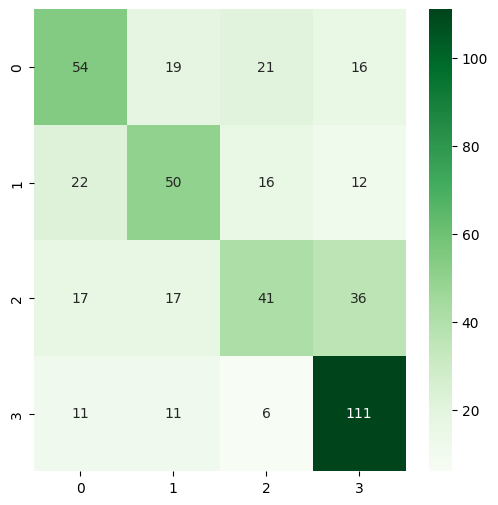

In [93]:
LR7 = LogisticRegression(penalty="l1", solver="saga", tol=0.01, max_iter=10000, random_state=0)
LR7.fit(X_train7,y_train7)
pred_LR7 = LR7.predict(X_test7)
Confusion_Matrix(confusion_matrix(y_test7,pred_LR7))
print(classification_report(y_test7, pred_LR7))
print(round(np.sum([y_test7==pred_LR7])/len(y_test7),4)*100,"%")
results.append(['images PCA 200', 'Logistic Regression',round(np.sum([y_test7==pred_LR7])/len(y_test7),4)*100 ])

# RUN ON DATA SET OF IMAGE PCA 500

In [94]:
pca3=PCA(n_components=500)
X_train9=pca3.fit_transform(X_train)
X_test9=pca3.transform(X_test)
y_train9 = y_train
y_test9 = y_test

print(X_train9.shape)
print(X_test9.shape)

(1073, 500)
(460, 500)


#### SVM

In [95]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train9, y_train9)
            pred_svm = svm.predict(X_test9)
            print(i,j,round(np.sum([y_test9==pred_svm])/len(y_test9),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train9, y_train9)
            pred_svm = svm.predict(X_test9)
            print(i,j,round(np.sum([y_test9==pred_svm])/len(y_test9),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train9, y_train9)
            pred_svm = svm.predict(X_test9)
            print(i,j,round(np.sum([y_test9==pred_svm])/len(y_test9),4)*100,"%")
        except:
            pass

OneVsOneClassifier
hinge l2 59.35 %
squared_hinge l2 59.35 %
OutputCodeClassifier
hinge l2 53.910000000000004 %
squared_hinge l2 31.52 %
OneVsRestClassifier
hinge l2 53.910000000000004 %
squared_hinge l2 53.910000000000004 %


              precision    recall  f1-score   support

           0       0.60      0.54      0.56       110
           2       0.56      0.66      0.61       100
           9       0.51      0.41      0.45       111
          11       0.66      0.74      0.70       139

    accuracy                           0.59       460
   macro avg       0.58      0.59      0.58       460
weighted avg       0.59      0.59      0.59       460

59.35 %


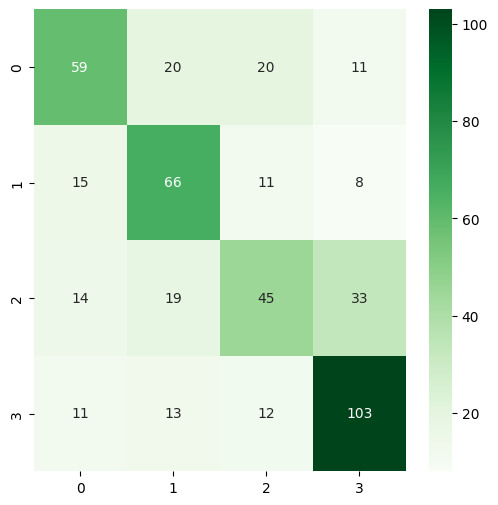

In [96]:
svm9 = OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train9, y_train9)
pred_svm9 = svm9.predict(X_test9)
Confusion_Matrix(confusion_matrix(y_test9,pred_svm9))
print(classification_report(y_test9, pred_svm9))
print(round(np.sum([y_test9==pred_svm9])/len(y_test9),4)*100,"%")
results.append(['images PCA 500', 'SVM',round(np.sum([y_test9==pred_svm9])/len(y_test9),4)*100 ])

#### KNN

In [97]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train9,y_train9)
    pred_knn = neigh.predict(X_test9)
    print(i,round(np.sum([y_test9==pred_knn])/len(y_test9),4)*100,"%")

1 59.13 %
2 53.7 %
3 55.00000000000001 %
4 54.35 %
5 54.779999999999994 %
6 55.87 %
7 56.52 %
8 56.089999999999996 %
9 57.38999999999999 %
10 55.22 %
11 55.43 %
12 54.56999999999999 %
13 54.56999999999999 %
14 54.56999999999999 %
15 53.480000000000004 %
16 53.910000000000004 %
17 54.56999999999999 %
18 54.56999999999999 %
19 54.13 %
20 54.779999999999994 %
21 54.779999999999994 %
22 54.779999999999994 %
23 55.00000000000001 %
24 53.480000000000004 %
25 53.7 %
26 53.7 %
27 53.26 %
28 54.56999999999999 %
29 54.13 %
30 54.13 %
31 53.7 %
32 53.26 %
33 54.35 %
34 54.35 %
35 54.56999999999999 %
36 53.910000000000004 %
37 54.35 %
38 53.910000000000004 %
39 54.35 %
40 53.26 %
41 54.13 %
42 53.910000000000004 %
43 53.7 %
44 53.7 %
45 53.480000000000004 %
46 53.04 %
47 53.04 %
48 52.61 %
49 53.26 %
50 53.04 %


              precision    recall  f1-score   support

           0       0.56      0.55      0.55       110
           2       0.59      0.60      0.60       100
           9       0.52      0.44      0.48       111
          11       0.66      0.74      0.70       139

    accuracy                           0.59       460
   macro avg       0.58      0.58      0.58       460
weighted avg       0.59      0.59      0.59       460

59.13 %


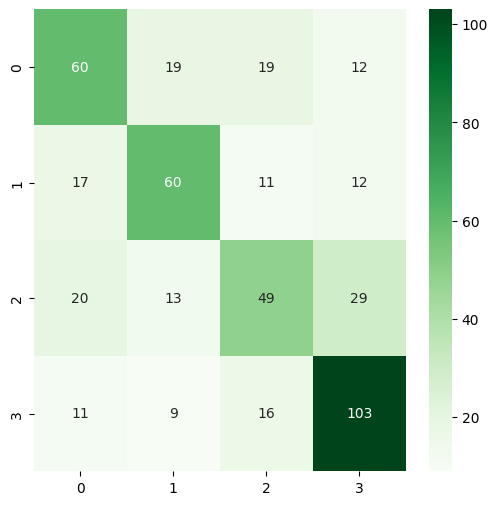

In [98]:
neigh9 = KNeighborsClassifier(n_neighbors=1)
neigh9.fit(X_train9,y_train9)
pred_knn9 = neigh9.predict(X_test9)
Confusion_Matrix(confusion_matrix(y_test9,pred_knn9))
print(classification_report(y_test9, pred_knn9))
print(round(np.sum([y_test9==pred_knn9])/len(y_test9),4)*100,"%")
results.append(['images PCA 500', 'KNN',round(np.sum([y_test9==pred_knn9])/len(y_test9),4)*100 ])

#### Adaboost

In [99]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train9,y_train9)
    pred_ada = ada.predict(X_test9)
    print(i,round(np.sum([y_test9==pred_ada])/len(y_test9),4)*100,"%")

50 47.61 %
100 47.17 %
150 47.83 %
200 48.699999999999996 %
250 51.300000000000004 %
300 53.26 %
350 53.04 %
400 51.09 %
450 53.26 %
500 51.739999999999995 %
550 52.39 %
600 53.26 %
650 53.910000000000004 %
700 55.00000000000001 %
750 55.22 %
800 54.56999999999999 %
850 53.7 %
900 52.39 %
950 51.519999999999996 %
1000 52.83 %
1050 52.39 %
1100 51.739999999999995 %
1150 51.959999999999994 %
1200 52.17 %
1250 53.04 %
1300 53.910000000000004 %
1350 53.7 %
1400 52.61 %
1450 53.7 %
1500 53.480000000000004 %
1550 53.7 %
1600 54.13 %
1650 53.480000000000004 %
1700 53.04 %
1750 53.04 %
1800 53.04 %
1850 52.61 %
1900 53.04 %
1950 52.61 %
2000 52.17 %


              precision    recall  f1-score   support

           0       0.41      0.37      0.39       110
           2       0.46      0.50      0.48       100
           9       0.48      0.45      0.46       111
          11       0.70      0.74      0.72       139

    accuracy                           0.53       460
   macro avg       0.51      0.52      0.51       460
weighted avg       0.53      0.53      0.53       460

53.04 %


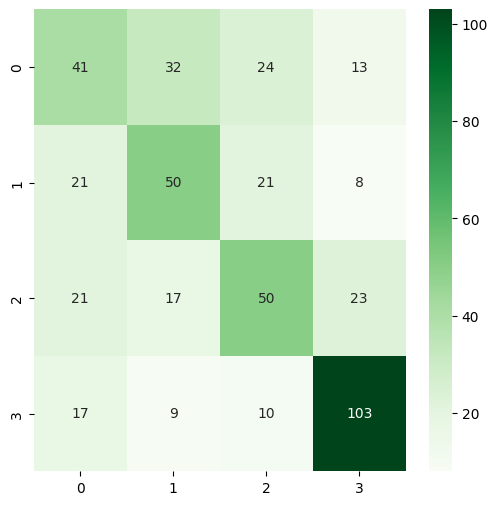

In [100]:
ada9 = AdaBoostClassifier(n_estimators=1900, algorithm="SAMME",random_state=0)
ada9.fit(X_train9,y_train9)
pred_ada9 = ada9.predict(X_test9)
Confusion_Matrix(confusion_matrix(y_test9,pred_ada9))
print(classification_report(y_test9, pred_ada9))
print(round(np.sum([y_test9==pred_ada9])/len(y_test9),4)*100,"%")
results.append(['images PCA 500', 'Adaboost',round(np.sum([y_test9==pred_ada9])/len(y_test9),4)*100 ])

#### Random Forest

In [101]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train9,y_train9)
        pred_RF = RF.predict(X_test9)
        print(i,j,round(np.sum([y_test9==pred_RF])/len(y_test9),4)*100,"%")

40 2 55.87 %
40 3 56.96 %
40 4 57.17 %
60 2 54.13 %
60 3 57.830000000000005 %
60 4 58.91 %
80 2 54.13 %
80 3 59.78 %
80 4 58.48 %
100 2 56.74 %
100 3 58.040000000000006 %
100 4 60.0 %
120 2 58.26 %
120 3 58.48 %
120 4 59.57 %
140 2 59.35 %
140 3 59.13 %
140 4 61.09 %
160 2 58.48 %
160 3 59.35 %
160 4 61.739999999999995 %
180 2 57.60999999999999 %
180 3 59.13 %
180 4 61.3 %
200 2 58.26 %
200 3 58.91 %
200 4 62.17 %
220 2 59.57 %
220 3 60.870000000000005 %
220 4 62.61 %
240 2 58.26 %
240 3 60.650000000000006 %
240 4 62.61 %
260 2 58.26 %
260 3 60.650000000000006 %
260 4 61.96 %
280 2 58.48 %
280 3 61.09 %
280 4 61.739999999999995 %
300 2 58.48 %
300 3 61.739999999999995 %
300 4 60.22 %
320 2 58.040000000000006 %
320 3 61.3 %
320 4 61.96 %
340 2 59.35 %
340 3 60.870000000000005 %
340 4 61.09 %
360 2 59.78 %
360 3 60.42999999999999 %
360 4 61.3 %
380 2 59.57 %
380 3 60.0 %
380 4 61.739999999999995 %
400 2 58.699999999999996 %
400 3 60.42999999999999 %
400 4 61.09 %
420 2 58.48 %
420 3 60.2

              precision    recall  f1-score   support

           0       0.50      0.54      0.52       110
           2       0.76      0.45      0.57       100
           9       0.50      0.51      0.51       111
          11       0.66      0.81      0.72       139

    accuracy                           0.59       460
   macro avg       0.61      0.58      0.58       460
weighted avg       0.61      0.59      0.59       460

59.35 %


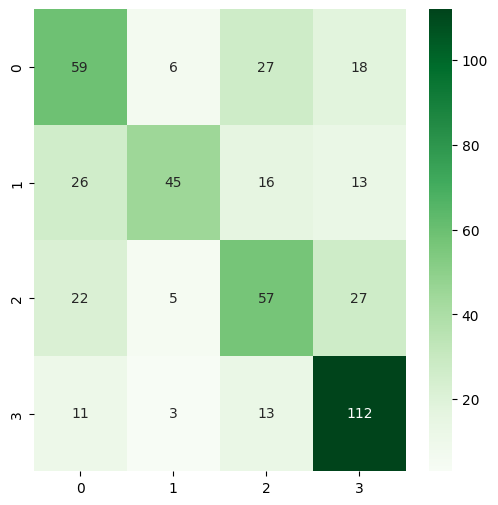

In [102]:
RF9 = RandomForestClassifier(n_estimators=340, max_depth=None,min_samples_split=2, random_state=0)
RF9.fit(X_train9,y_train9)
pred_RF9 = RF9.predict(X_test9)
Confusion_Matrix(confusion_matrix(y_test9,pred_RF9))
print(classification_report(y_test9, pred_RF9))
print(round(np.sum([y_test9==pred_RF9])/len(y_test9),4)*100,"%")
results.append(['images PCA 500', 'Random Forest',round(np.sum([y_test9==pred_RF9])/len(y_test9),4)*100 ])

#### Logistic Regression

In [103]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train9,y_train9)
                pred_LR = LR.predict(X_test9)
                print(i,j,k,round(np.sum([y_test9==pred_LR])/len(y_test9),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 55.65 %
l1 liblinear 0.01 53.480000000000004 %
l1 liblinear 0.001 52.61 %
l1 saga 0.1 57.17 %
l1 saga 0.01 58.040000000000006 %
l1 saga 0.001 57.38999999999999 %
l2 lbfgs 0.1 55.87 %
l2 lbfgs 0.01 56.3 %
l2 lbfgs 0.001 56.52 %
l2 liblinear 0.1 55.22 %
l2 liblinear 0.01 52.39 %
l2 liblinear 0.001 53.7 %
l2 newton-cg 0.1 56.74 %
l2 newton-cg 0.01 56.52 %
l2 newton-cg 0.001 56.52 %
l2 sag 0.1 58.699999999999996 %
l2 sag 0.01 56.52 %
l2 sag 0.001 58.26 %
l2 saga 0.1 57.17 %
l2 saga 0.01 58.040000000000006 %
l2 saga 0.001 57.38999999999999 %


              precision    recall  f1-score   support

           0       0.54      0.55      0.55       110
           2       0.52      0.51      0.52       100
           9       0.58      0.40      0.47       111
          11       0.66      0.82      0.73       139

    accuracy                           0.59       460
   macro avg       0.57      0.57      0.57       460
weighted avg       0.58      0.59      0.58       460

58.699999999999996 %


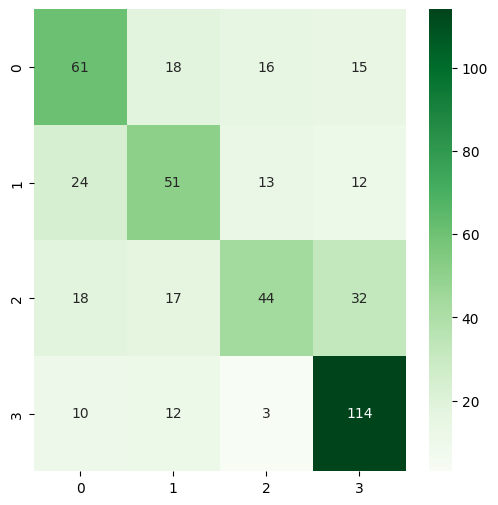

In [104]:
LR9 = LogisticRegression(penalty="l2", solver="sag", tol=0.1, max_iter=10000, random_state=0)
LR9.fit(X_train9,y_train9)
pred_LR9 = LR9.predict(X_test9)
Confusion_Matrix(confusion_matrix(y_test9,pred_LR9))
print(classification_report(y_test9, pred_LR9))
print(round(np.sum([y_test9==pred_LR9])/len(y_test9),4)*100,"%")
results.append(['images PCA 500', 'Logistic Regression',round(np.sum([y_test9==pred_LR9])/len(y_test9),4)*100 ])

In [105]:
cols = ["df_type","classifier","accuracy"]
df = pd.DataFrame(results, columns=cols)

In [106]:
df

,df_type,classifier,accuracy
0,images PCA 100,SVM,47.17
1,images PCA 100,KNN,60.87
2,images PCA 100,Adaboost,54.78
3,images PCA 100,Random Forest,63.04
4,images PCA 100,Logistic Regression,56.96
5,images PCA 200,SVM,51.52
6,images PCA 200,KNN,59.35
7,images PCA 200,Adaboost,54.35
8,images PCA 200,Random Forest,63.48
9,images PCA 200,Logistic Regression,55.65


In [107]:
import pickle
filenames = ['svm6.sav','knn6.sav','ada6.sav','RF6.sav','LR6.sav',
             'svm7.sav','knn7.sav','ada7.sav','RF7.sav','LR7.sav',
             'svm9.sav','knn9.sav','ada9.sav','RF9.sav','LR9.sav']
models= [svm6,neigh6,ada6,RF6,LR6,
        svm7,neigh7,ada7,RF7,LR7,
        svm9,neigh9,ada9,RF9,LR9]

for i in range(len(filenames)): 
    pickle.dump(models[i], open(filenames[i], 'wb'))